In [6]:
def is_safe(board, row, col):
    # 同じ列にクイーンがあるかチェック
    for i in range(row):
        if board[i][col] == 1:
            return False

    # 左上の対角線にクイーンがあるかチェック
    i, j = row, col
    while i >= 0 and j >= 0:
        if board[i][j] == 1:
            return False
        i -= 1
        j -= 1

    # 右上の対角線にクイーンがあるかチェック
    i, j = row, col
    while i >= 0 and j < len(board):
        if board[i][j] == 1:
            return False
        i -= 1
        j += 1

    return True

def solve_n_queens(board, row):
    if row >= len(board):
        return True

    for col in range(len(board)):
        if is_safe(board, row, col):
            board[row][col] = 1
            if solve_n_queens(board, row + 1):
                return True
            board[row][col] = 0

    return False

def print_board(board):
    for row in board:
        print(" ".join("Q" if col == 1 else "." for col in row))

n = 8
board = [[0] * n for _ in range(n)]

if solve_n_queens(board, 0):
    print_board(board)
else:
    print("解が見つかりませんでした")

Q . . . . . . .
. . . . Q . . .
. . . . . . . Q
. . . . . Q . .
. . Q . . . . .
. . . . . . Q .
. Q . . . . . .
. . . Q . . . .


In [1]:
# モジュールのインポート
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
# グリッドのサイズ
GRID_SIZE = 10

# ユニットの種類とその開口部
units = {
    'A': [(0, 1), (0, -1)],
    'B': [(1, 0), (-1, 0)],
    'C': [(1, 1), (-1, -1)],
    'D': [(-1, 1), (1, -1)]
}

In [3]:
# ベクトル方向のセルを1に置き換え
def replace_one(grid, coordinate, vectors):
    for vector in vectors:
        x, y = coordinate
        dx, dy = vector
        while 0 <= x + dx < grid.shape[0] and 0 <= y + dy < grid.shape[1]:
            x += dx
            y += dy
            if 0 <= x < grid.shape[0] and 0 <= y < grid.shape[1]:
                grid[x, y] = 1
    return grid

# プロット関数
def plot_grid(grid, units, unit_counts):
    fig, ax = plt.subplots(figsize=(10, 10))
    # グリッドをプロット
    ax.set_xlim(-0.5, grid.shape[1] - 0.5)
    ax.set_ylim(-0.5, grid.shape[0] - 0.5)
    ax.set_xticks(np.arange(-0.5, grid.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-0.5, grid.shape[0], 1), minor=True)
    ax.grid(which='minor', color='k', linestyle='-', linewidth=2)
    # 文字と線をプロット
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            if grid[i, j] in range(65, 69): # ASCII values of A, B, C, D
                letter = chr(grid[i, j])
                ax.text(j, i, letter, fontsize=24, ha='center', va='center', color='black', fontweight='bold')
                for vector in units[letter]:
                    x, y = j, i
                    dy, dx = vector
                    while 0 <= x + dx < grid.shape[1] and 0 <= y + dy < grid.shape[0]:
                        x += dx
                        y += dy
                        if 0 <= x < grid.shape[1] and 0 <= y < grid.shape[0]:
                            color = 'orange' if letter == 'A' else 'yellow' if letter == 'B' else 'blue' if letter == 'C' else 'green'
                            ax.plot([j, x], [i, y], color=color, linewidth=2)
    # ラベルをセット
    ax.set_xticks(range(grid.shape[1]))
    ax.set_xticklabels(range(1, grid.shape[1] + 1))
    ax.set_yticks(range(grid.shape[0]))
    ax.set_yticklabels(range(1, grid.shape[0] + 1))
    plt.gca().invert_yaxis()
    plt.show()

# 結果を表示
def results(unit_counts):
    # 合計を計算
    total_units = sum(unit_counts.values())
    # 最大と最小の差を計算
    max_min_difference = max(unit_counts.values()) - min(unit_counts.values())
    
    print("ユニットの数: ", unit_counts)
    print("ユニットの合計: ", total_units, "最大と最小の差: ", max_min_difference)

# 評価関数
def evaluate_grid(unit_counts):
    total_units = sum(unit_counts.values())
    max_min_difference = max(unit_counts.values()) - min(unit_counts.values())
    return total_units - max_min_difference

# unitの配置
def place_unit(grid):
    finish_count = 0
    unit_counts = {'A': 0, 'B': 0, 'C': 0, 'D': 0}
    while True:
        unit_type = np.random.choice(['A', 'B', 'C', 'D']) # 設置するunitを決める
        
        # 対応するunitの設置できる場所を確定する
        unit_where = np.where((grid != 0) & (grid != 1)) # すでに設置されているunitの場所を探す
        unit_coordinates = list(zip(unit_where[0], unit_where[1])) # 設置されているunitの座標
        grid_copy = copy.deepcopy(grid) # 深いコピー
        for unit_coordinate in unit_coordinates: # 設置できない場所を1で埋める
            grid_copy = replace_one(grid_copy, unit_coordinate, units[unit_type])
            
        zero_where = np.where(grid_copy == 0) # 設置できる座標を探す
        
        if len(zero_where[0]) == 0: # 終了判定
            finish_count += 1
            if finish_count == 20:
                break
            continue
        else:
            coordinates = list(zip(zero_where[0], zero_where[1])) # 設置できる座標
            coordinate = coordinates[np.random.choice(len(coordinates))] # 座標からランダムに一つ選ぶ
            grid[coordinate[0], coordinate[1]] = ord(unit_type) # アルファベットを数字に変換して、unitを設置
            unit_counts[unit_type] += 1
            grid = replace_one(grid, coordinate, units[unit_type])# 開口部の直線状を1に変える
    return grid, unit_counts

In [4]:
# 1000回回して上位を保存
def main(iterations=1000, top_n=10):
    best_grids = []
    best_scores = []
    best_unit_counts_list = []
    for _ in range(iterations):
        grid = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)
        grid, unit_counts = place_unit(grid)
        score = evaluate_grid(unit_counts)
        if len(best_scores) < top_n or score > min(best_scores):
            if len(best_scores) == top_n:
                min_index = best_scores.index(min(best_scores))
                best_scores.pop(min_index)
                best_grids.pop(min_index)
                best_unit_counts_list.pop(min_index)
            best_scores.append(score)
            best_grids.append(grid)
            best_unit_counts_list.append(unit_counts)
    return best_grids, best_unit_counts_list

Top 1 Grid:
ユニットの数:  {'A': 4, 'B': 5, 'C': 10, 'D': 9}
ユニットの合計:  28 最大と最小の差:  6


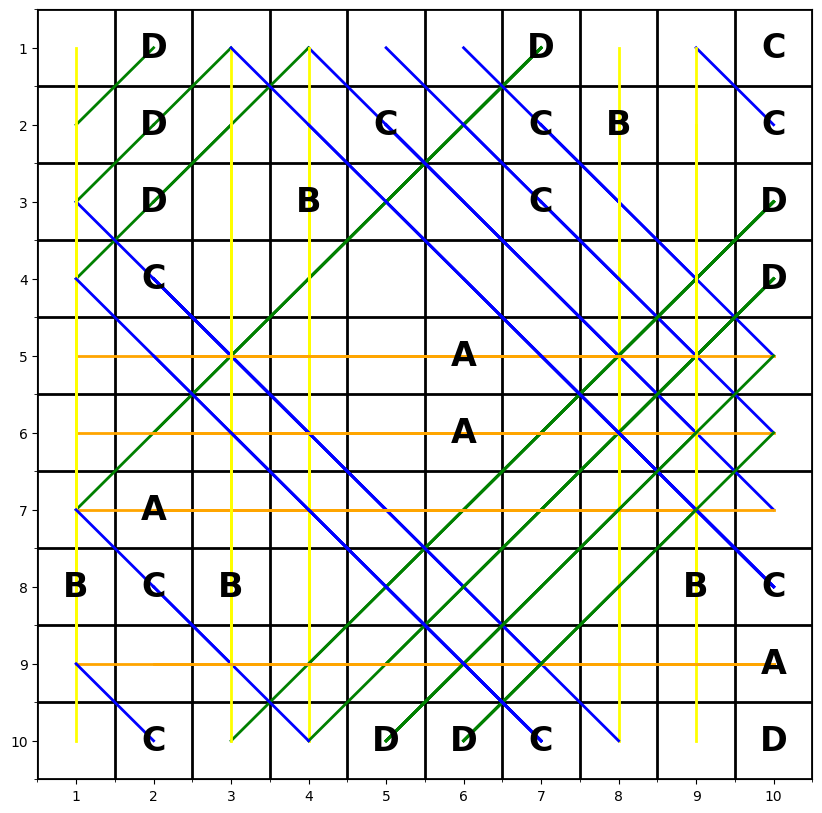

Top 2 Grid:
ユニットの数:  {'A': 4, 'B': 5, 'C': 10, 'D': 10}
ユニットの合計:  29 最大と最小の差:  6


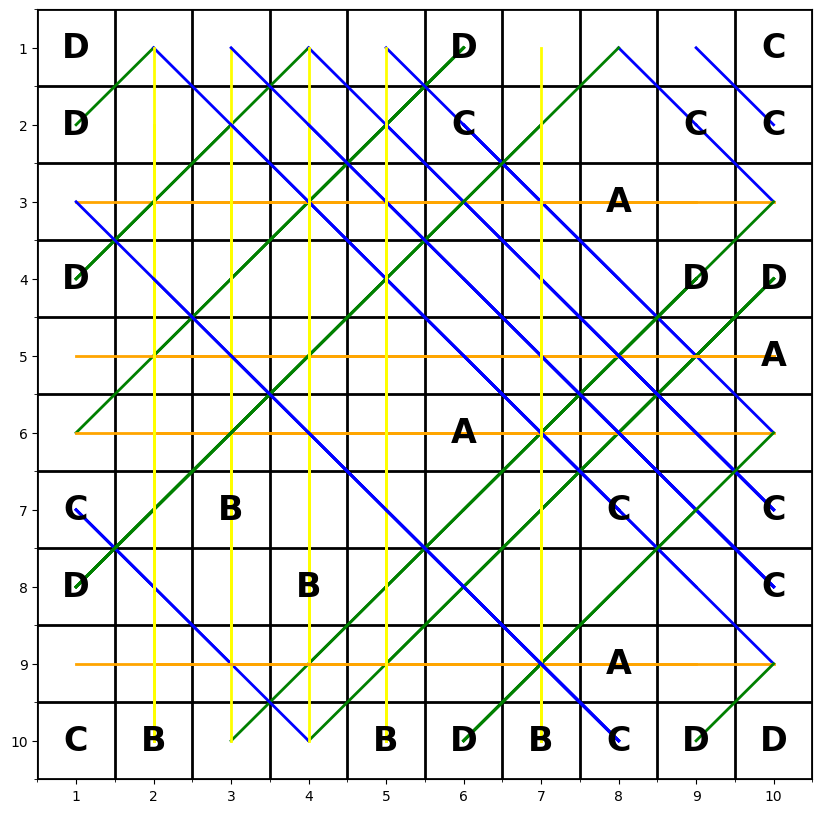

Top 3 Grid:
ユニットの数:  {'A': 5, 'B': 6, 'C': 7, 'D': 6}
ユニットの合計:  24 最大と最小の差:  2


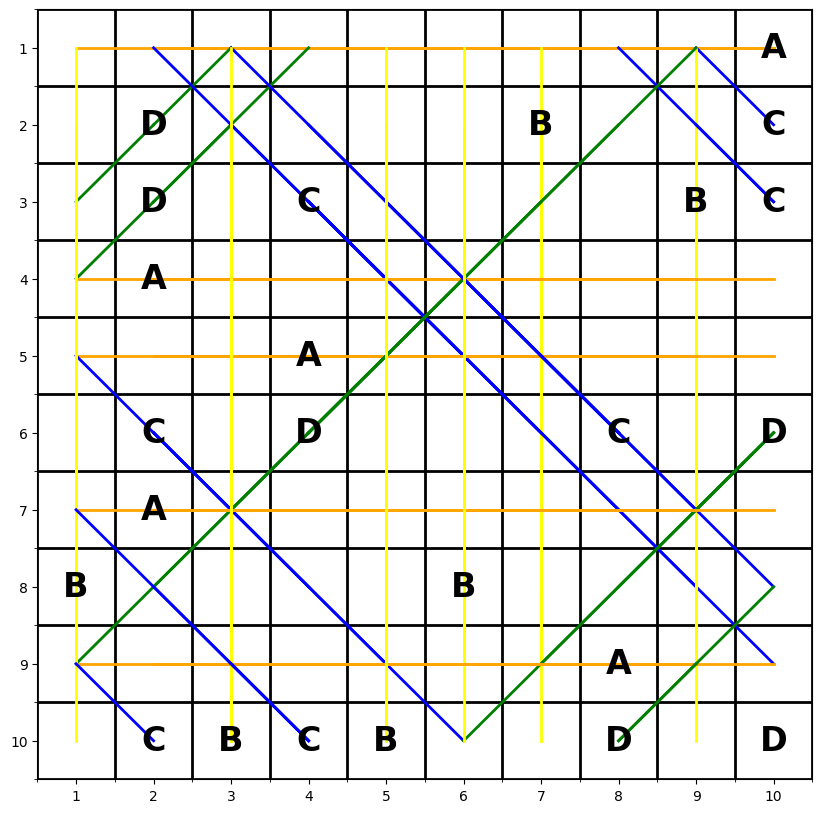

Top 4 Grid:
ユニットの数:  {'A': 6, 'B': 5, 'C': 7, 'D': 7}
ユニットの合計:  25 最大と最小の差:  2


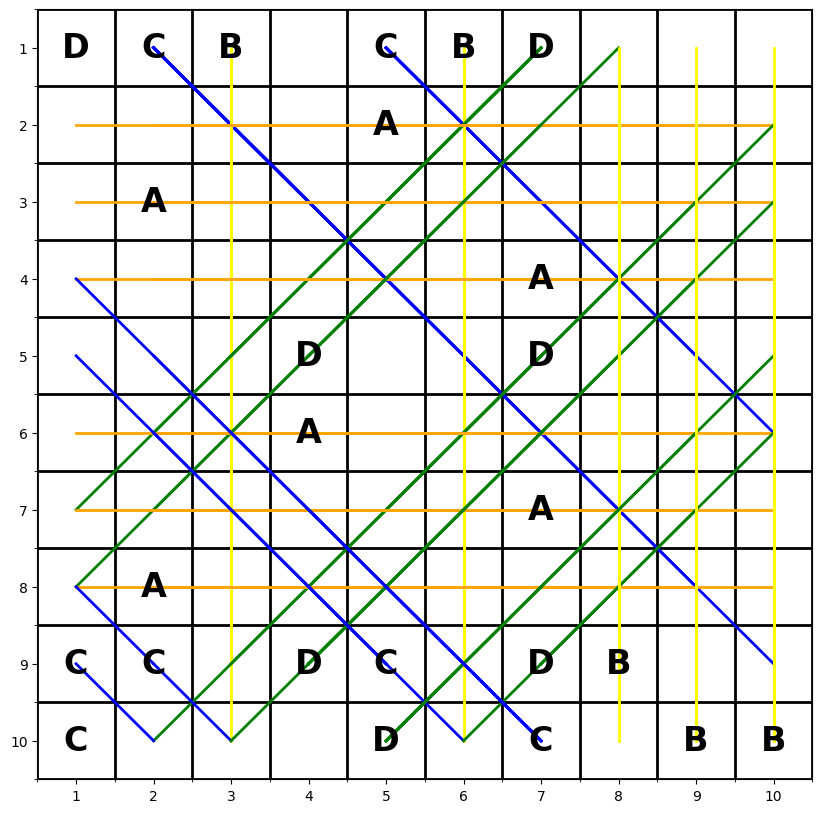

Top 5 Grid:
ユニットの数:  {'A': 5, 'B': 6, 'C': 7, 'D': 6}
ユニットの合計:  24 最大と最小の差:  2


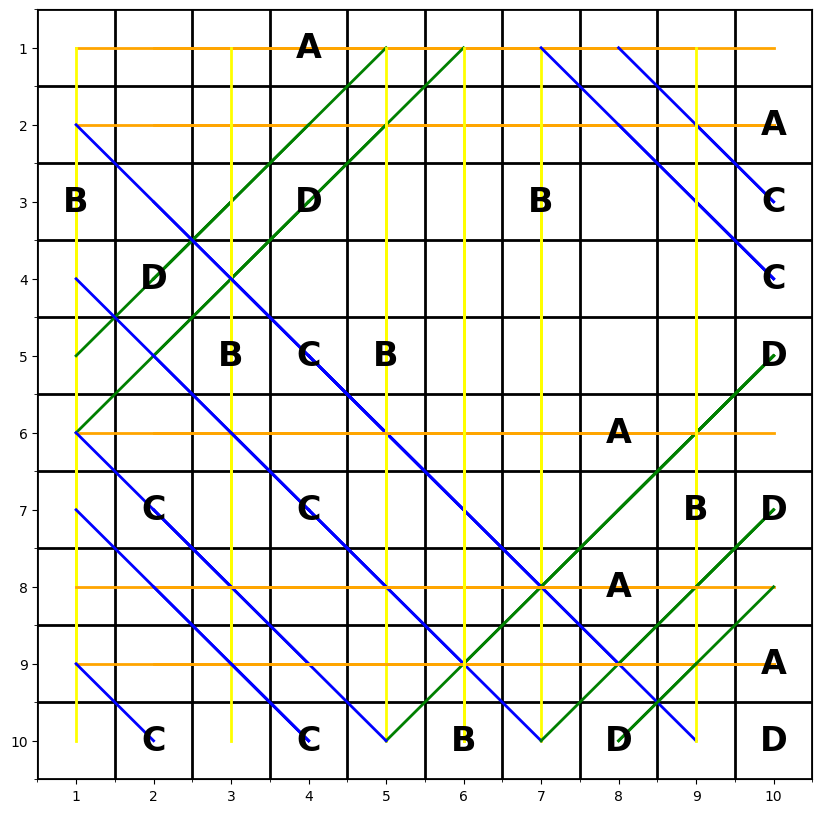

Top 6 Grid:
ユニットの数:  {'A': 5, 'B': 5, 'C': 7, 'D': 7}
ユニットの合計:  24 最大と最小の差:  2


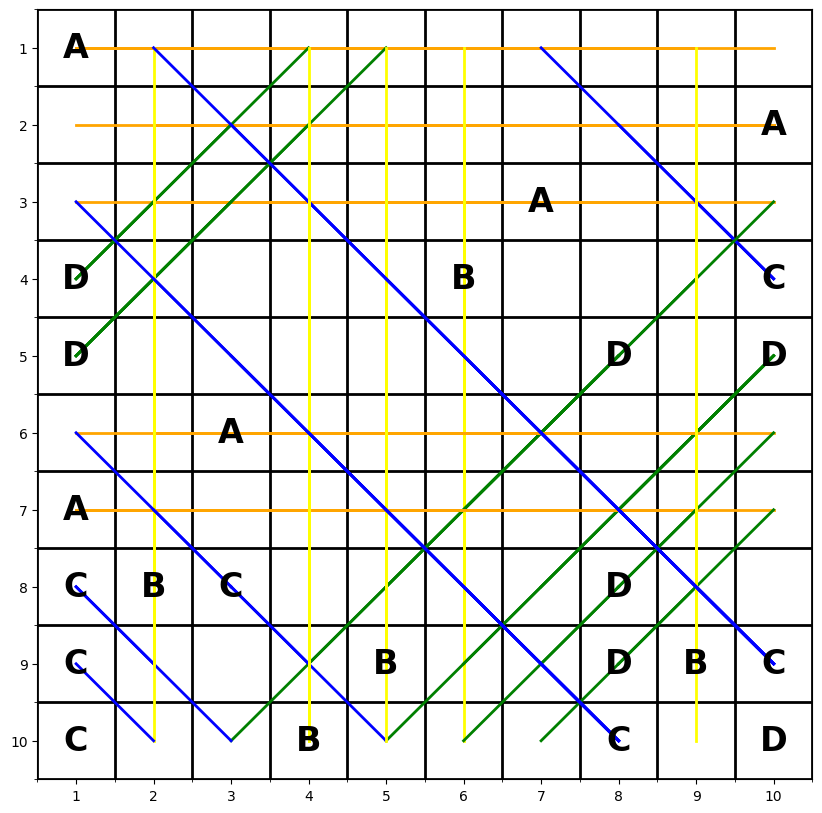

Top 7 Grid:
ユニットの数:  {'A': 5, 'B': 5, 'C': 7, 'D': 7}
ユニットの合計:  24 最大と最小の差:  2


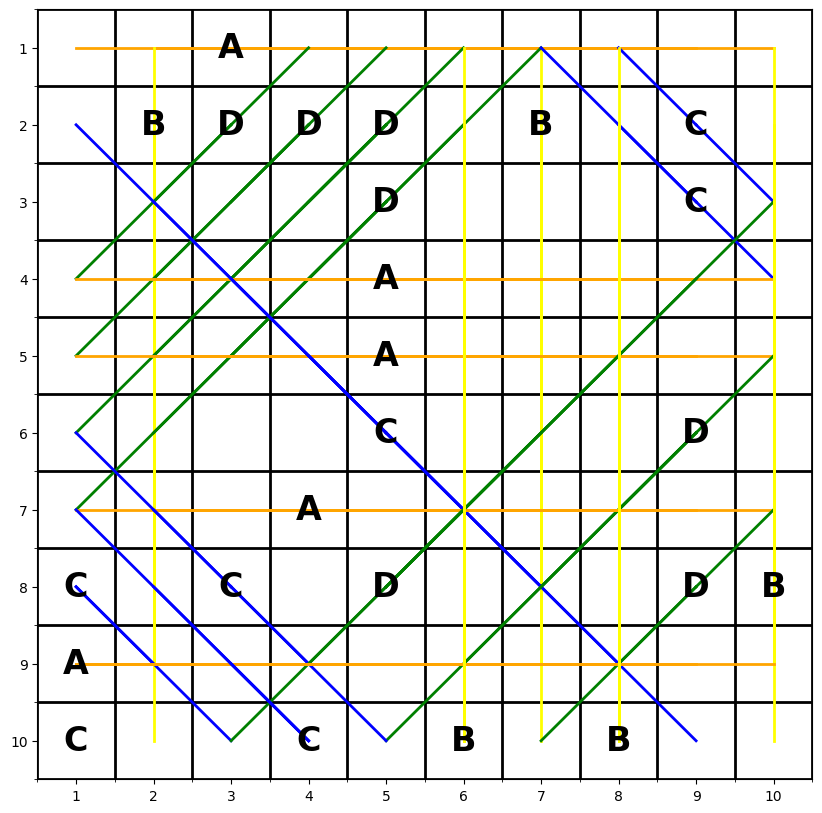

Top 8 Grid:
ユニットの数:  {'A': 5, 'B': 6, 'C': 7, 'D': 6}
ユニットの合計:  24 最大と最小の差:  2


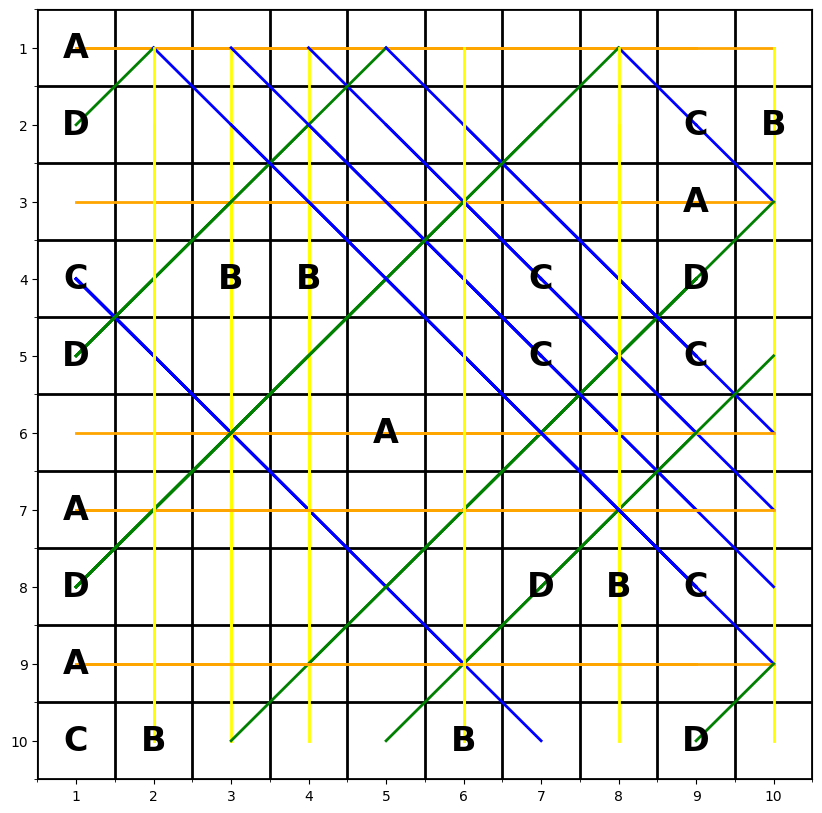

Top 9 Grid:
ユニットの数:  {'A': 4, 'B': 6, 'C': 8, 'D': 8}
ユニットの合計:  26 最大と最小の差:  4


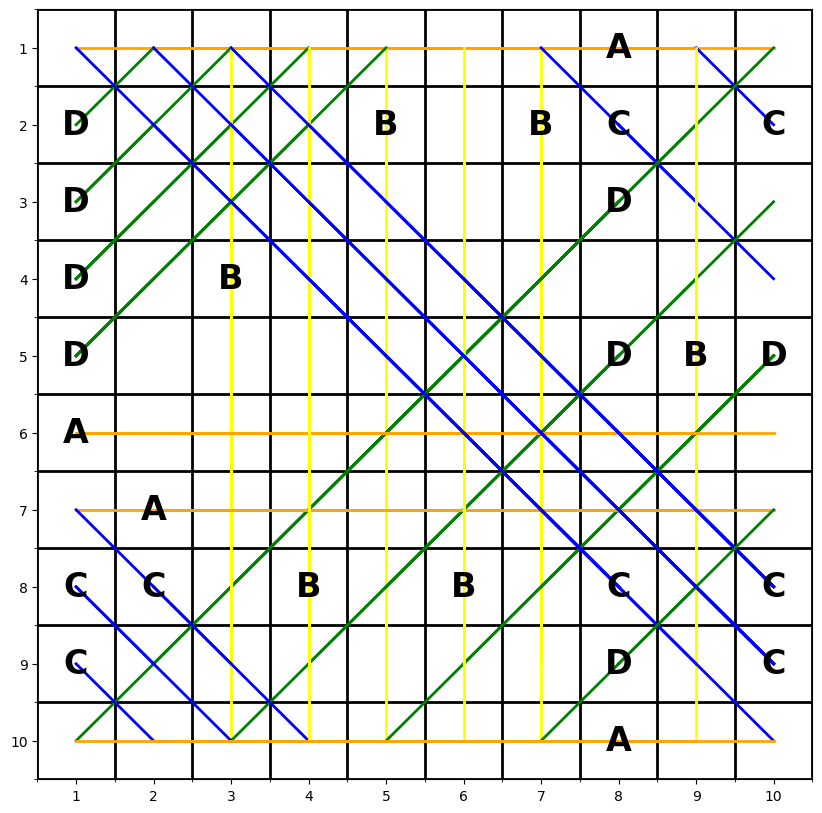

Top 10 Grid:
ユニットの数:  {'A': 6, 'B': 6, 'C': 6, 'D': 6}
ユニットの合計:  24 最大と最小の差:  0


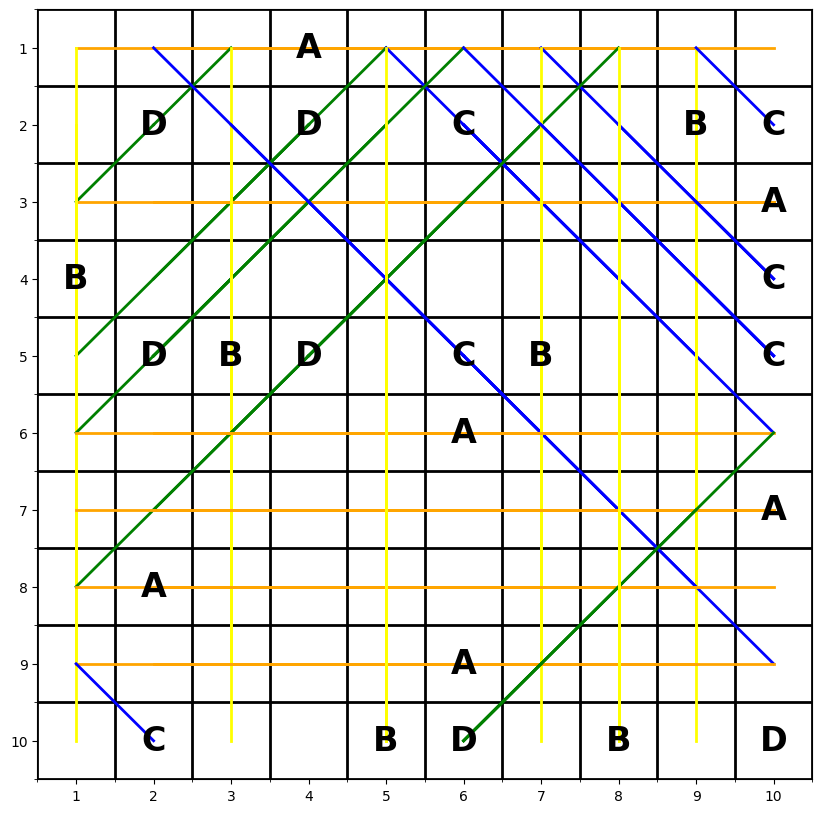

In [5]:
# 最適化を実行し、上位10位の配置を取得
if __name__ == "__main__":
    best_grids, best_unit_counts_list = main()

# 上位10位の配置を表示
for i in range(len(best_grids)):
    print(f"Top {i+1} Grid:")
    results(best_unit_counts_list[i])
    plot_grid(best_grids[i], units, best_unit_counts_list[i])